## Telco Customer Churn Analysis with Machine Learning Techniques


#### Group 7 - Purvi Thakor, Akshay Kamath
For all firms that bill customers on a regular basis, one of the main variables is customer churning. Having worked on some telco projects in a professional capacity, this area wasn’t new for us.

However, applying ML techniques to predict customer behavior isn’t something that either one of us has done before. We were keen to see if we could identify the key reasons behind customer churn & if possible, help create a model that would help retain the same customers. 

We came across such a data set on the <a href="https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/">IBM Watson Analytics website</a> & started to work on it.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from ggplot import *


In [2]:
telcomdata = pd.read_csv("https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?cm_mc_uid=26343256174115220055780&cm_mc_sid_50200000=66278061522005578104&cm_mc_sid_52640000=90810111522005578116")
telcomdata.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Converting datatypes

In [3]:
telcomdata['TotalCharges']=pd.to_numeric(telcomdata['TotalCharges'],errors="coerce")
telcomdata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
telcomdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Data has 11 missing values. Hence, we discard them before we proceed with our EDA.

In [5]:
telcomdata = telcomdata.dropna()

### Exploratory Data Analysis

We started out with some descriptive analytics.

In [6]:
print(list(telcomdata.columns))
print("-"*40)
print(telcomdata.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
----------------------------------------
(7032, 21)


So our data consisted of 7032 customers (observations) and 21 variables (features).

In [7]:
round(telcomdata[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.0,7032.0,7032.0
mean,32.4,64.8,2283.3
std,24.5,30.1,2266.8
min,1.0,18.2,18.8
25%,9.0,35.6,401.4
50%,29.0,70.4,1397.5
75%,55.0,89.9,3794.7
max,72.0,118.8,8684.8


* As we can see, the average time that a customer sticks with the telco is slightly more than 2 years. 

* Average the Monthly Charges are \$64.8 & the Average Total Charges are \$2283.3.

In order to get a better understanding of our data, we decided to explore it visually.

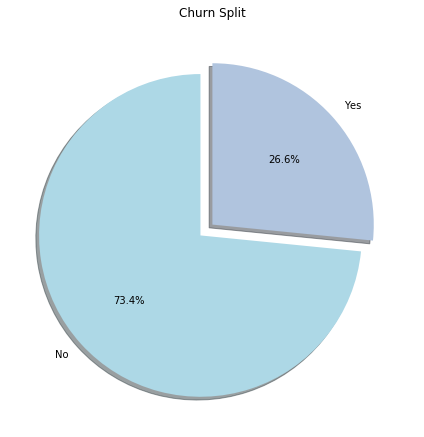

In [8]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(telcomdata["Churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

As we can see, from our data of around 7000 entries, only **26.6%** of the customers have churned out. The other **73.4%** have stayed with the company.

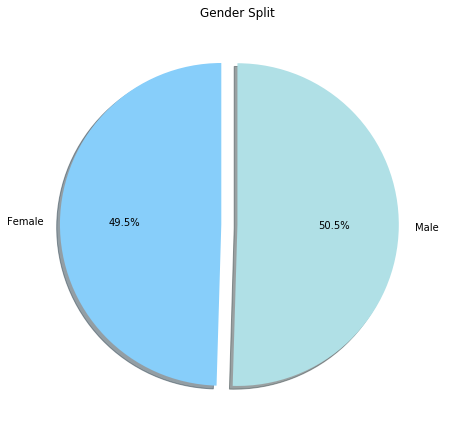

In [9]:
labels, values = zip(*Counter(telcomdata["gender"]).items())
colors = ['lightskyblue', 'powderblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

Our data is almost split down the middle when comparing the gender split.

We then plot our data across **Tenure** & **Churn**.

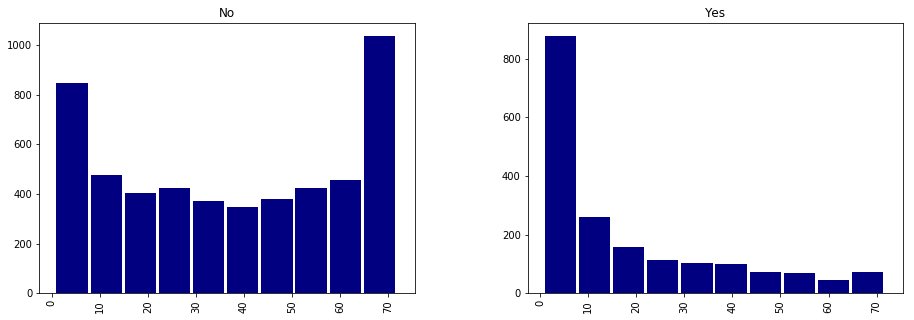

In [10]:
fig=telcomdata['tenure'].hist(by=telcomdata['Churn'],figsize=(15,5),width=6.5, color='navy' )
plt.show()

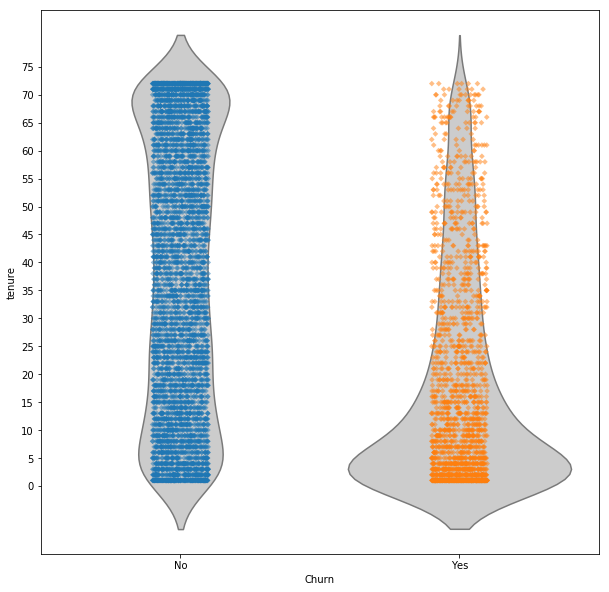

In [11]:
plt.subplots(figsize=(10,10))

g = sns.violinplot(x="Churn", y="tenure", data=telcomdata, inner=None,color="0.8")
g = sns.stripplot(x="Churn", y="tenure", data=telcomdata, jitter=True, marker="D", size=4, alpha=0.5,edgecolor="gray")

g.set_yticks(np.arange(0,80,5))
g

As we can see in the first chart, the bars are highest at 70 months & then less than 10 months. This may mean that most customers who stay with the company are either new ones or ones that have been with the company for around 6 years, i.e their most loyal customers.

On the other hand, if we look at customers who have quit, they are the highest in the first few months.



Our data consist of only 3 features which are continuous. The rest of our variables are categorical. For any kind of analysis, we need to encode  the categorical data.

We do this using the Label Encoder package.

The feature **customerID** is unique & is not useful to us. Hence, we do not consider it in our analysis.

In [12]:
#transforming the data

telcomdata = telcomdata.apply(LabelEncoder().fit_transform)
telcomdata = telcomdata.drop('customerID',axis=1)
telcomdata.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1


In order to have a look at the correlation between our variables, we decided to look at the correlation plot using the Pearson Method.

We have a lot of variables in our dataset. This isn't really a good way to look at the correlation matrix. So, we plotted the Heatmap. 

In [13]:
telcomdata.corr(method="pearson")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013929,-0.000579,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219210,0.107202,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.107482,0.342319,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.105948,0.081626,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.267182,0.871680,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.271652,0.085934,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.445006,0.463532,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.243738,-0.209762,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.044322,0.246996,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.141519,0.352453,-0.195290


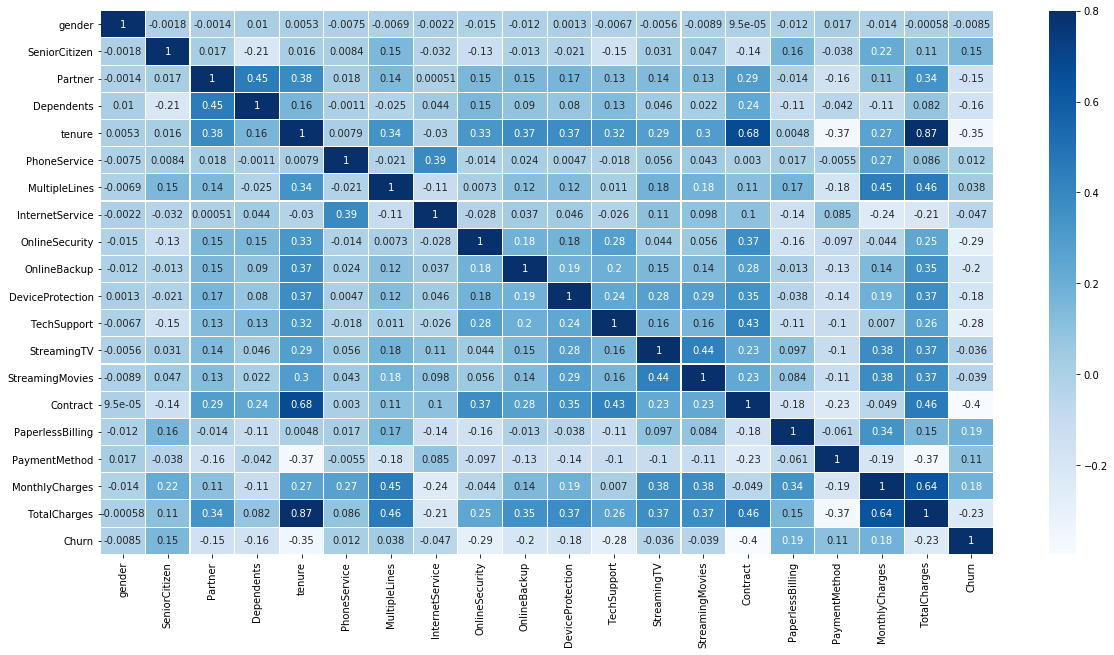

In [14]:
# Correlation Plot
corrmat = telcomdata.corr()

#Set uo the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'White', vmax=0.8, annot=True)


Variables, **TotalCharges, MonthlyCharges** & **Tenure** are the variables which seem highly correlated which seems obvious. **TotalCharges** is nothing but **MonthlyCharges** times **Tenure**. To avoid multicollinearity, we get rid of the **TotalCharges** feature in our analysis.

### Data Preprocessing, Feature Selection & Feature Importance

As the first step in our data preprocessing, we split the data into Features & Target. After this we split our data into training, & testing. To bring the variables on the same scale, we standardize the data.

In [15]:
#Splitting the data into features & target

X = telcomdata.iloc[:,:-2]
y = telcomdata[["Churn"]]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)
#scaling the data

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


Our dataset consists of 18 features. In order to check whether there are any redundant variables to the model building process, we use a couple of methods.

   * Feature Importance using Random Forest Classifier

   * Recursive Feature Elimination using Logistic Regression Classifier


In [17]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, telcomdata.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances

MonthlyCharges      0.233021
tenure              0.225098
Contract            0.087561
PaymentMethod       0.063334
TechSupport         0.047610
OnlineSecurity      0.047193
gender              0.033516
OnlineBackup        0.030724
PaperlessBilling    0.029269
Partner             0.027679
DeviceProtection    0.026863
MultipleLines       0.026073
InternetService     0.025465
SeniorCitizen       0.025406
Dependents          0.023294
StreamingMovies     0.021250
StreamingTV         0.020435
PhoneService        0.006208
dtype: float64

As we can see, the features that contribute most to the customer's decision to either stick or change are **MonthlyCharges** & **tenure**. To check if the features that contributed the least to feature importance can actually be eliminated from the model building process, we use Recursive Feature Elimination.


In [18]:
#lr = LogisticRegression(penalty="l1",C=.1,random_state=0)

from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

selector = RFECV(estimator=gaussian, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
selector.fit(X_train_std, y_train)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

The output of the RFE is surprising since it mentions that the optnmal number of variables are **18**. So we decided to include all the variables in our analysis & move ahead.

### Model Building & Comparison

We've used quite a few models to check which fits best on our data. 

Models used are -

   * Logistic Regression

   * Random Forest Classifier

   * Decision Tree Classifier

   * kNN Classifier

   * Gaussian Naive-Bayes

Our target variable is a binary variable. The customer either stays or leaves. Hence, we decided to use the Logistic Regression as our first model to check how the data fits the model. The models have been selected in no specific order.

### Model 1 - Logistic Regression


In [ ]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)
lr.fit(X_train_std,y_train)

y_pred_lr = lr.predict(X_test_std)

train_acc_log = round((lr.score(X_train_std, y_train))*100,1)
test_acc_log = round((lr.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

In [ ]:
from sklearn.metrics import roc_curve

preds = lr.predict_proba(X_test_std)[:,1]
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_lr,tpr=tpr_lr))
auc_lr = round(metrics.auc(fpr_lr,tpr_lr),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Logistic Regression with AUC = %s" % str(auc_lr))

In [ ]:
X_arr = X.values
y_arr = y.values.flatten()

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection

predicted = model_selection.cross_val_predict(LogisticRegression(), X_arr, y_arr, cv=10)

lr_cv_score = round(metrics.accuracy_score(y_arr, predicted)*100,1)

print("Logistic Regression score after using Cross Validation (k=10) is : %s %%"% lr_cv_score)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

##Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logit_cm = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

### Conclusions - Logistic Regression

We then tried to fit the model on the test data using Logistic Regression our model accuracy is **80.5%**.

As we can see, the ROC curve doesn't look that great either. However, the AUC (Area Under the curve) is **84%**.

The model metrics can be seen in the Precision, Recall, F1 Score. On an average, our model had around **80%** Precision, Recall & F1 score. It was able to identify the churned customers better than the ones that stay.


### Model 2 -  Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")

rfc.fit(X_train_std,y_train)

y_pred_rfc = rfc.predict(X_test_std)

train_acc_rfc = round((rfc.score(X_train_std, y_train))*100,1)
test_acc_rfc = round((rfc.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

In [ ]:
# from sklearn.metrics import roc_curve
# #!pip install ggplot
# from ggplot import *

preds = rfc.predict_proba(X_test_std)[:,1]
fpr_rfc, tpr_rfc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_rfc,tpr=tpr_rfc))

auc_rfc = round(metrics.auc(fpr_rfc,tpr_rfc),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Random Forest Classifier with AUC = %s" % str(auc_rfc))

In [ ]:
print(classification_report(y_test, y_pred_rfc))

##Confusion matrix

rfc_cm = metrics.confusion_matrix(y_pred_rfc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RFC')

### Conclusions - Random Forest Classifier

Unfortunately, our Random Forest Classifier (RFC) did not fare better as compared to our initial model where we used Logistic Regression.

The model accuracy fell to **79%**. Obviously, the ROC didn't perform much better either (AUC = **82%**). 

It didn't make sense to run a Cross Validation on the RFC since each tree is constructed using a different bootstrap sample from the original data & the estimate of the test error sample is estimated internally, during the run. 

Each tree is constructed using a different bootstrap sample from the original data & about one-third of the cases are left out of the bootstrap sample and not used in the construction of the kth tree. Basically, the classifier checks for accuracy/error iteratively & does not need to be validated again using Cross Validation.

### Model 3 - Decision Tree Classifier

In [ ]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=0)

dtc.fit(X_train_std,y_train)

y_pred_dtc = dtc.predict(X_test_std)

train_acc_dtc = round((dtc.score(X_train_std, y_train))*100,1)
test_acc_dtc = round((dtc.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

In [ ]:
preds = dtc.predict_proba(X_test_std)[:,1]

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_dtc,tpr=tpr_dtc))

auc_dtc = round(metrics.auc(fpr_dtc,tpr_dtc),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Decision Tree Classifier with AUC = %s" % str(auc_dtc))

In [ ]:
X_arr = X.values
y_arr = y.values.flatten()

predicted = model_selection.cross_val_score(tree.DecisionTreeClassifier(), X_arr, y_arr, cv=10)

dtc_cv_score = round(np.mean(predicted)*100,1)

print("Decision Tree Classifier score after using Cross Validation (k=10) is : %s %%" % dtc_cv_score)

In [ ]:
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

dtc_cm = metrics.confusion_matrix(y_pred_dtc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(dtc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classifier')

### Conclusions - Decision Tree Classifier

Our Decision Tree Classifier is a bit disapointing too. Test accuracy is only **71%** and the 10 fold Cross-Validation figure is similar (**72%**). We came across a couple of articles that mentioned that Decision Trees handle categorical data better than continuous data. Surprisingly, for our data, Tree classifiers are giving us worse results than other methods. Again, the precision, recall & f1 Score are low. 

We can infer that we need to tweak the models to improve their performance.

### Model 4 - k Nearest Neighbors Classifier (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_std,y_train)

y_pred_knn = knn.predict(X_test_std)

train_acc_knn = round((knn.score(X_train_std, y_train))*100,1)
test_acc_knn = round((knn.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn)
print('Test accuracy: %s %%' % test_acc_knn)

In [ ]:
preds = knn.predict_proba(X_test_std)[:,1]

fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_knn,tpr=tpr_knn))

auc_knn = round(metrics.auc(fpr_knn,tpr_knn),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for KNN Classifier (k=3) with AUC = %s" % str(auc_knn))

In [ ]:
myList = list(range(0,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
knn_cv_score = []

# perform 10-fold cross validation
for k in neighbors:
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn_cv_score.append(scores.mean())
    
knn_cv_score = np.asarray(knn_cv_score)
#knn_cv_score.mean()
knn_cv_score = round(np.mean(predicted)*100,1)

print("kNN score after using Cross Validation (k=10) is : %s %%"% knn_cv_score)

In [ ]:
print(classification_report(y_test, y_pred_knn))

##Confusion matrix

knn_cm = metrics.confusion_matrix(y_pred_knn, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('kNN')

In [ ]:
myList = list(range(0,50))

neighbors = filter(lambda x: x % 2 != 0, myList)

knn_cv_score_opt = []

# empty list that will hold cv scores
neighbors = [i for i in myList if myList[i]%2!=0]

# perform 10-fold cross validation
for k in neighbors:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_opt, X_train, y_train, cv=10, scoring='accuracy')
    knn_cv_score_opt.append(scores.mean())
    

In [ ]:
MSE = [1 - x for x in knn_cv_score_opt]

optimal_k = neighbors[MSE.index(min(MSE))]

knn_cv_score_opt = round(np.mean(knn_cv_score_opt)*100,1)

print ("The optimal number of neighbors is :",optimal_k)

#plot misclassification error vs k
plt.figure(figsize=(12,7))
plt.plot(neighbors, MSE)
#plt.yticks(np.arange(0,0.3,.5))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_opt = KNeighborsClassifier(n_neighbors = optimal_k)

knn_opt.fit(X_train_std,y_train)

y_pred_knn_opt = knn_opt.predict(X_test_std)

train_acc_knn_opt = round((knn_opt.score(X_train_std, y_train))*100,1)

test_acc_knn_opt = round((knn_opt.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn_opt)
print('Test accuracy: %s %%' % test_acc_knn_opt)

In [ ]:
preds_opt = knn_opt.predict_proba(X_test_std)[:,1]

fpr_knn_opt, tpr_knn_opt, thresholds_opt = metrics.roc_curve(y_test, preds_opt)
#tpr_knn_opt
roc_data_opt = pd.DataFrame(dict(fpr=fpr_knn_opt,tpr=tpr_knn_opt))

auc_knn_opt = round(metrics.auc(fpr_knn_opt,tpr_knn_opt),2)

ggplot(roc_data_opt,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for KNN Classifier (k=optimal) with AUC = %s" % str(auc_knn_opt))

In [ ]:
print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn_opt))


##Confusion matrix
knn_cm_opt = metrics.confusion_matrix(y_pred_knn_opt, y_test, [1,0])

a=['Deltaic Plains','Hummock and Swale']

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (20,8))

sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"],yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r,ax=ax1)
ax1.set_title("k NN with k = 3")
ax1.set_ylabel('True class')
ax1.set_xlabel('Predicted class')


sns.heatmap(knn_cm_opt, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r, ax=ax2)
ax2.set_title("k NN with k = 27 (optimal)")
ax2.set_ylabel('True class')
ax2.set_xlabel('Predicted class')


### Conclusions - k Nearest Neighbors Classifier (kNN)

We started building the kNN by using 3 neighbors for the model. The initial model gave us an accuracy of **73.3%** on our test data. On using the 10 fold Cross Validation, the model accuracy improved to **72.7%**. Again, the Precision, Recall, & F1 Score is around **73%** which isn't too good.

However, in order to get the optimum number of classifiers, we decided to let the model calculate iteratively & let us know what the optimum k value should be. Obviously, since having an odd number of neighbors works, we selected odd numbers from 1 - 50 & then passed the data through the knn_cv_score (basically the model accuracy). Since, model accuracy + model error = 1, we calculate the model errors using the accuracy figures. The model with the least error, can be considered as the one with the optimum neighbors.

In our model, we got 27 as the optimal neighbor number. We then proceeded to carry out the exact same procedure that we had done for k = 3.

Our model accuracy improved by slightly more than 2% to **76.5%** to . The metrics (precision, recall, f1 Score) do not seem to have changed a lot at all. 



### Model 5 - Gaussian Naive-Bayes Classifier 

In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(X_train_std, y_train)

y_pred_gauss = gaussian.predict(X_test_std)

train_acc_gauss = round((gaussian.score(X_train_std, y_train))*100,1)
test_acc_gauss = round((gaussian.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_gauss)
print('Test accuracy: %s %%' % test_acc_gauss)

In [ ]:
# from sklearn.metrics import roc_curve
# #!pip install ggplot
# from ggplot import *

preds = gaussian.predict_proba(X_test_std)[:,1]
fpr_nb, tpr_nb, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_nb,tpr=tpr_nb))

auc_gaussian = round(metrics.auc(fpr_nb,tpr_nb),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Gaussian Naive-Bayes Classifier with AUC = %s" % str(auc_gaussian))

In [ ]:
predicted = model_selection.cross_val_score(GaussianNB(),X_arr,y_arr,cv=10)

nb_cv_score = round(np.mean(predicted)*100,1)

print("Naive Bayes score after using Cross Validation (k=10) is : %s %%"% nb_cv_score)

In [ ]:
print(classification_report(y_test, y_pred_gauss))

##Confusion matrix

gauss_cm = metrics.confusion_matrix(y_pred_gauss, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(gauss_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gaussian Naive-Bayes')
plt.show()

### Conclusions - Gaussian Naive-Bayes Classifier

Again, our model's accuracy is around **75%**. The precision, recall & f1 Score lie in the range of **76%** to **79%**. 

### Model Comparison

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='kNN - 3 neighbors')
plt.plot(fpr_knn_opt, tpr_knn_opt, label='kNN - 27 neighbors')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

As we can see, the model with the best ROC curve is the Logistic Regression. Naïve Bayes & Random Forest are competing for the second place. Comparing the 2 kNN models, we can see that the one with k as 27 is a lot better than the one with 3 neighbors. The Decision Model looks to be our worst model.

Our observations from the AUC concur with the test data scores across all the models, as shown below. 


In [ ]:
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'k NN (k=3)', 'k NN (k=27)', 
              'Gaussian Naive-Bayes'],
    'Testing Score': [test_acc_log , test_acc_rfc, test_acc_dtc, test_acc_knn,test_acc_knn_opt,test_acc_gauss],
    'k Fold Cross Validations (k=10)': [lr_cv_score ,"0", dtc_cv_score, knn_cv_score, knn_cv_score_opt, nb_cv_score],
    'AUC': [auc_lr,auc_rfc,auc_dtc,auc_knn,auc_knn_opt,auc_gaussian]
})

summary[['Testing Score','k Fold Cross Validations (k=10)']] = summary[['Testing Score','k Fold Cross Validations (k=10)']].astype(str) + '%'
summary.iloc[1,3] = "NA"

summary = summary.sort_values(by='Testing Score', ascending=False).reset_index(drop=True).reindex(range(len(summary)))
summary=summary[['Model','Testing Score','k Fold Cross Validations (k=10)', 'AUC']]

summary

### Closing Remarks

* It would be interesting to have more features, some continuous ones preferably, in our model & do this exercise all over again. This would probably increase the efficiency of our models.

* One of the more surprising outputs was that Recursive Feature Elimination (RFE) didn’t help eliminate any redundant features. 

* We came across a couple of articles that mentioned that Decision Trees handle categorical variables better than continuous variables. That did not seem to be the case in our models. 

* Based on the model scores, to predict customer churn Logistic Regression seems to be the best model for this dataset. 
